<h1>Импорт библиотек

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

<h1>Задача 1. Дан набор из $p$ матриц размерностью $(n, n)$ и $p$ векторов размерностью $(n, 1)$, найти сумму произведений матриц на векторы. Написать тесты для кода

In [16]:
def sum_prod(X, V):
    '''
    X - матрицы (n, n)
    V - векторы (n, 1)
    Гарантируется, что len(X) == len(V)
    '''
    result = np.zeros((X[0].shape[0], 1), dtype=X[0].dtype)
    for i in range(len(X)):
        result += X[i] @ V[i]
    return result

def test_sum_prod():
    X1 = np.array([[1, 2], [3, 4]])
    V1 = np.array([[1], [2]])
    X2 = np.array([[2, 0], [0, 2]])
    V2 = np.array([[3], [4]])

    print("X1 @ V1 =", X1 @ V1)
    print("X2 @ V2 =", X2 @ V2)
    print("Сумма =", (X1 @ V1) + (X2 @ V2))

    result = sum_prod([X1, X2], [V1, V2])
    print("Результат функции:", result)

    expected = np.array([[11], [19]])
    assert np.allclose(result, expected), f"Expected {expected}, got {result}"

    result = sum_prod([np.eye(3)], [np.array([[1], [2], [3]])])
    expected = np.array([[1], [2], [3]])
    assert np.allclose(result, expected)

    X = [np.zeros((2, 2)), np.zeros((2, 2))]
    V = [np.ones((2, 1)), np.ones((2, 1))]
    result = sum_prod(X, V)
    expected = np.zeros((2, 1))
    assert np.allclose(result, expected)

    print("Тесты пройдены успешно")

test_sum_prod()

X1 @ V1 = [[ 5]
 [11]]
X2 @ V2 = [[6]
 [8]]
Сумма = [[11]
 [19]]
Результат функции: [[11]
 [19]]
Тесты пройдены успешно


<h1>Задача 2. Дана матрица M, напишите функцию, которая бинаризует матрицу по некоторому threshold (то есть, все значения большие threshold становятся равными 1, иначе 0). Напишите тесты для кода

In [17]:
def binarize(M, threshold=0.5):
    return (M > threshold).astype(int)

def test_binarize():
    M1 = np.array([[0.1, 0.6], [0.4, 0.9]])
    result1 = binarize(M1, 0.5)
    expected1 = np.array([[0, 1], [0, 1]])
    assert np.array_equal(result1, expected1), f"Test 1 failed: {result1} != {expected1}"

    M2 = np.array([[0.4, 0.5, 0.6]])
    result2 = binarize(M2)
    expected2 = np.array([[0, 0, 1]])
    assert np.array_equal(result2, expected2), f"Test 2 failed: {result2} != {expected2}"

    M3 = np.array([[0.2, 0.3, 0.7, 0.8]])
    result3 = binarize(M3, 0.3)
    expected3 = np.array([[0, 0, 1, 1]])
    assert np.array_equal(result3, expected3), f"Test 3 failed: {result3} != {expected3}"

    M4 = np.array([[0.1, 0.2, 0.3]])
    result4 = binarize(M4, 0.5)
    expected4 = np.array([[0, 0, 0]])
    assert np.array_equal(result4, expected4), f"Test 4 failed: {result4} != {expected4}"

    M5 = np.array([[0.6, 0.7, 0.8]])
    result5 = binarize(M5, 0.5)
    expected5 = np.array([[1, 1, 1]])
    assert np.array_equal(result5, expected5), f"Test 5 failed: {result5} != {expected5}"

    M6 = np.array([[-1, 0, 1, 2]])
    result6 = binarize(M6, 0)
    expected6 = np.array([[0, 0, 1, 1]])
    assert np.array_equal(result6, expected6), f"Test 6 failed: {result6} != {expected6}"

    print("Все тесты для binarize() пройдены успешно!")

test_binarize()

Все тесты для binarize() пройдены успешно!


<h1>Задача 3. Напишите функцию, которая возвращает уникальные элементы из каждой строки матрицы. Напишите такую же функцию, но для столбцов. Напишите тесты для кода

In [18]:
def unique_rows(mat):
    result = []
    for row in mat:
        result.append(np.unique(row))
    return result

def unique_columns(mat):
    result = []
    for col in mat.T:
        result.append(np.unique(col))
    return result

def test_unique_functions():
    mat1 = np.array([[1, 2, 3],
                     [4, 4, 4],
                     [5, 6, 5]])

    rows1 = unique_rows(mat1)
    expected_rows1 = [np.array([1, 2, 3]), np.array([4]), np.array([5, 6])]
    for i, (r, e) in enumerate(zip(rows1, expected_rows1)):
        assert np.array_equal(r, e), f"Test 1 rows failed at row {i}: {r} != {e}"

    cols1 = unique_columns(mat1)
    expected_cols1 = [np.array([1, 4, 5]), np.array([2, 4, 6]), np.array([3, 4, 5])]
    for i, (c, e) in enumerate(zip(cols1, expected_cols1)):
        assert np.array_equal(c, e), f"Test 1 cols failed at col {i}: {c} != {e}"

    mat2 = np.array([[1, 1, 1],
                     [2, 2, 2],
                     [3, 3, 3]])

    rows2 = unique_rows(mat2)
    expected_rows2 = [np.array([1]), np.array([2]), np.array([3])]
    for i, (r, e) in enumerate(zip(rows2, expected_rows2)):
        assert np.array_equal(r, e), f"Test 2 rows failed at row {i}: {r} != {e}"

    cols2 = unique_columns(mat2)
    expected_cols2 = [np.array([1, 2, 3]), np.array([1, 2, 3]), np.array([1, 2, 3])]
    for i, (c, e) in enumerate(zip(cols2, expected_cols2)):
        assert np.array_equal(c, e), f"Test 2 cols failed at col {i}: {c} != {e}"

    mat3 = np.array([[1, 2, 1, 2],
                     [3, 3, 3, 3],
                     [4, 5, 6, 7]])

    rows3 = unique_rows(mat3)
    expected_rows3 = [np.array([1, 2]), np.array([3]), np.array([4, 5, 6, 7])]
    for i, (r, e) in enumerate(zip(rows3, expected_rows3)):
        assert np.array_equal(r, e), f"Test 3 rows failed at row {i}: {r} != {e}"

    cols3 = unique_columns(mat3)
    expected_cols3 = [np.array([1, 3, 4]), np.array([2, 3, 5]),
                      np.array([1, 3, 6]), np.array([2, 3, 7])]
    for i, (c, e) in enumerate(zip(cols3, expected_cols3)):
        assert np.array_equal(c, e), f"Test 3 cols failed at col {i}: {c} != {e}"

    print("Все тесты для unique_rows и unique_columns пройдены успешно!")

test_unique_functions()

Все тесты для unique_rows и unique_columns пройдены успешно!


<h1>Задача 4. Напишите функцию, которая заполняет матрицу с размерами $(m, n)$ случайными числами, распределенными по нормальному закону. Затем считает мат. ожидание и дисперсию для каждого из столбцов и строк, а также строит для каждой строки и столбца гистограмму значений (использовать функцию hist из модуля matplotlib.plot)

Сгенерированная матрица:
[[ 0.49671415 -0.1382643   0.64768854  1.52302986]
 [-0.23415337 -0.23413696  1.57921282  0.76743473]
 [-0.46947439  0.54256004 -0.46341769 -0.46572975]]

Статистика по строкам:
Строка 1: МО = 0.6323, Дисперсия = 0.3514
Строка 2: МО = 0.4696, Дисперсия = 0.5776
Строка 3: МО = -0.2140, Дисперсия = 0.1908

Статистика по столбцам:
Столбец 1: МО = -0.0690, Дисперсия = 0.1692
Столбец 2: МО = 0.0567, Дисперсия = 0.1196
Столбец 3: МО = 0.5878, Дисперсия = 0.6972
Столбец 4: МО = 0.6082, Дисперсия = 0.6719



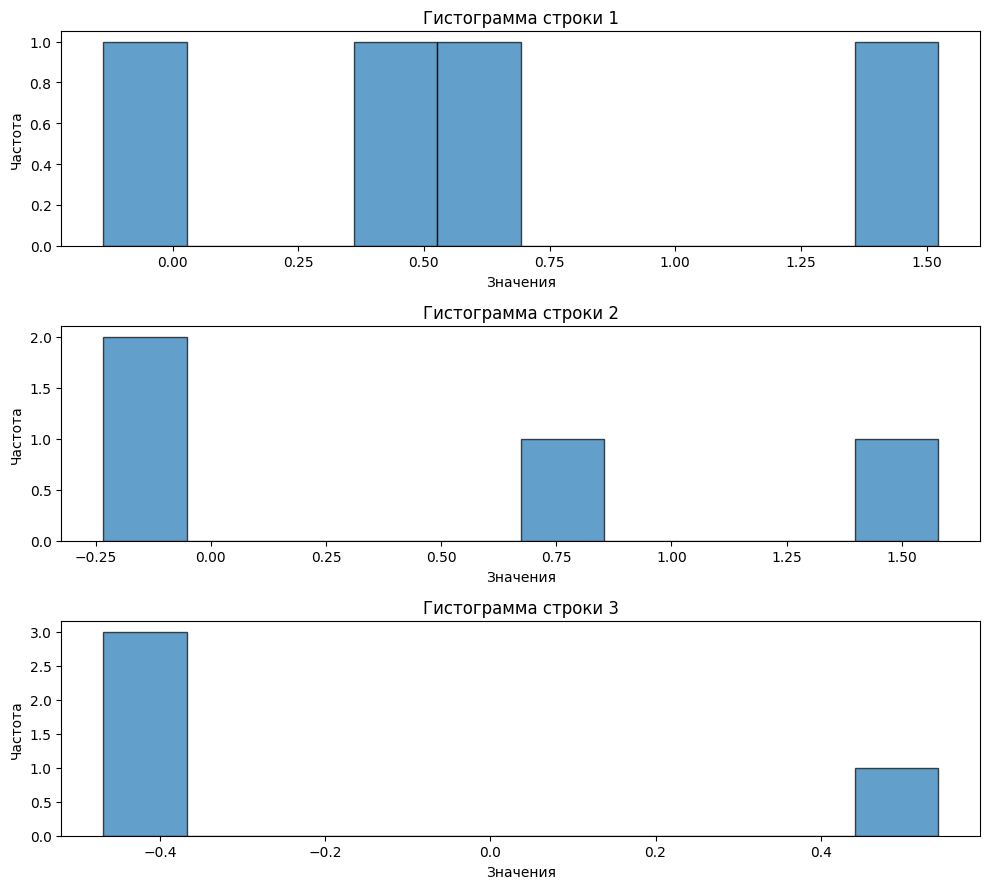

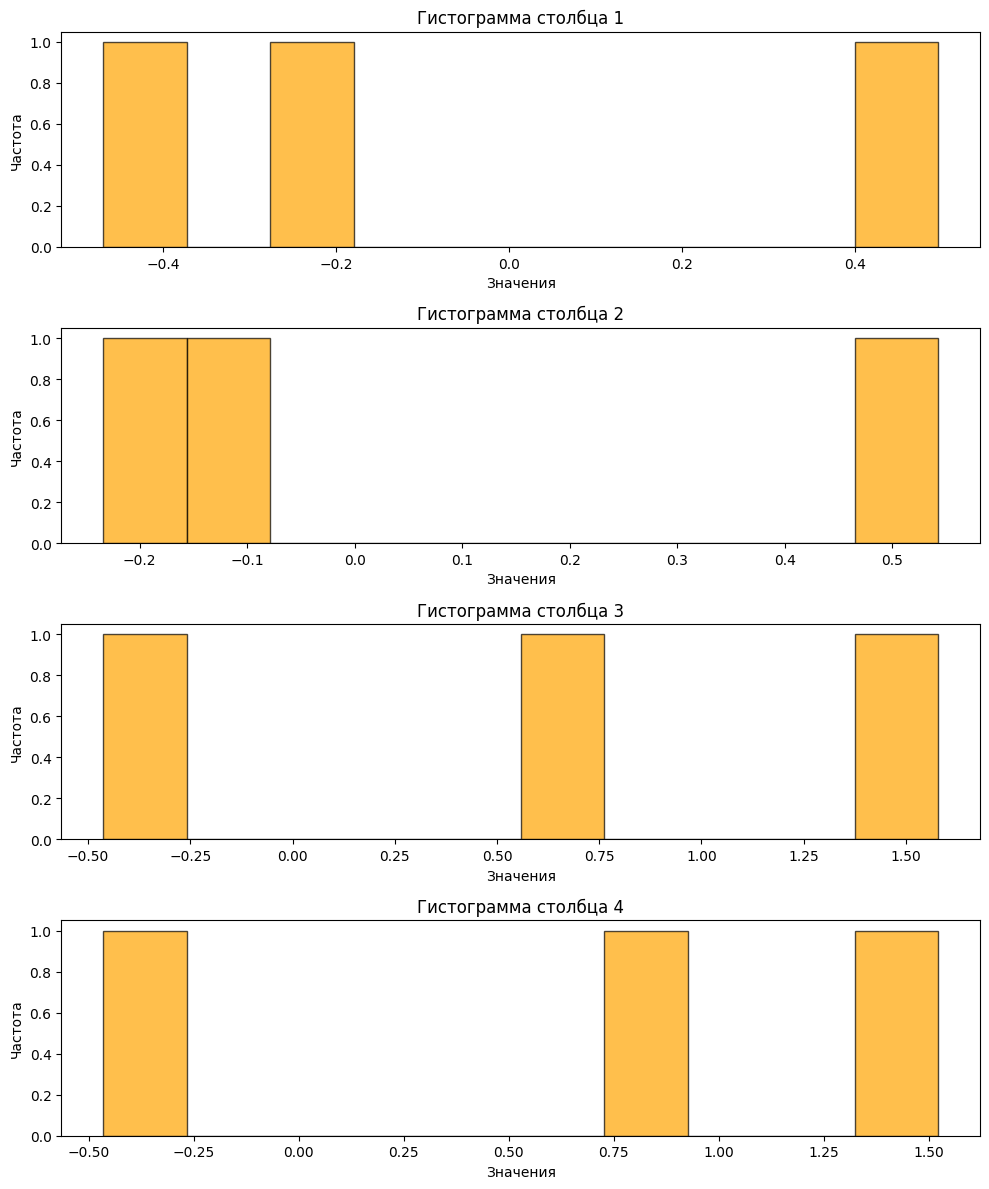

In [19]:
def analyze_matrix(m, n, mean=0, std=1):
    matrix = np.random.normal(mean, std, (m, n))

    print("Сгенерированная матрица:")
    print(matrix)
    print()

    print("Статистика по строкам:")
    for i in range(m):
        row_mean = np.mean(matrix[i, :])
        row_var = np.var(matrix[i, :])
        print(f"Строка {i+1}: МО = {row_mean:.4f}, Дисперсия = {row_var:.4f}")

    print()

    print("Статистика по столбцам:")
    for j in range(n):
        col_mean = np.mean(matrix[:, j])
        col_var = np.var(matrix[:, j])
        print(f"Столбец {j+1}: МО = {col_mean:.4f}, Дисперсия = {col_var:.4f}")

    print()

    fig, axes = plt.subplots(m, 1, figsize=(10, 3*m))
    if m == 1:
        axes = [axes]

    for i in range(m):
        axes[i].hist(matrix[i, :], bins=10, alpha=0.7, edgecolor='black')
        axes[i].set_title(f'Гистограмма строки {i+1}')
        axes[i].set_xlabel('Значения')
        axes[i].set_ylabel('Частота')

    plt.tight_layout()
    plt.show()

    fig, axes = plt.subplots(n, 1, figsize=(10, 3*n))
    if n == 1:
        axes = [axes]

    for j in range(n):
        axes[j].hist(matrix[:, j], bins=10, alpha=0.7, edgecolor='black', color='orange')
        axes[j].set_title(f'Гистограмма столбца {j+1}')
        axes[j].set_xlabel('Значения')
        axes[j].set_ylabel('Частота')

    plt.tight_layout()
    plt.show()

    return matrix

np.random.seed(42)
matrix_result = analyze_matrix(3, 4, mean=0, std=1)

<h1>Задача 5. Напишите функцию, которая заполняет матрицу $(m, n)$ в шахматном порядке заданными числами $a$ и $b$. Напишите тесты для кода

In [20]:
def chess(m, n, a, b):
    result = np.zeros((m, n), dtype=type(a))
    for i in range(m):
        for j in range(n):
            if (i + j) % 2 == 0:
                result[i, j] = a
            else:
                result[i, j] = b
    return result

def test_chess():
    result1 = chess(2, 2, 1, 0)
    expected1 = np.array([[1, 0], [0, 1]])
    assert np.array_equal(result1, expected1), f"Test 1 failed: {result1} != {expected1}"

    result2 = chess(3, 3, 1, 2)
    expected2 = np.array([[1, 2, 1], [2, 1, 2], [1, 2, 1]])
    assert np.array_equal(result2, expected2), f"Test 2 failed: {result2} != {expected2}"

    result3 = chess(2, 4, 'A', 'B')
    expected3 = np.array([['A', 'B', 'A', 'B'], ['B', 'A', 'B', 'A']])
    assert np.array_equal(result3, expected3), f"Test 3 failed: {result3} != {expected3}"

    result4 = chess(3, 2, 0.5, 1.5)
    expected4 = np.array([[0.5, 1.5], [1.5, 0.5], [0.5, 1.5]])
    assert np.array_equal(result4, expected4), f"Test 4 failed: {result4} != {expected4}"

    result5 = chess(1, 1, 7, 3)
    expected5 = np.array([[7]])
    assert np.array_equal(result5, expected5), f"Test 5 failed: {result5} != {expected5}"

    result6 = chess(4, 4, 0, 1)
    for i in range(4):
        for j in range(4):
            expected_val = 0 if (i + j) % 2 == 0 else 1
            assert result6[i, j] == expected_val, f"Test 6 failed at position ({i},{j})"

    print("Все тесты для chess() пройдены успешно!")

test_chess()

Все тесты для chess() пройдены успешно!


<h1>Задача 6. Напишите функцию, которая отрисовывает прямоугольник с заданными размерами (a, b) на изображении размера (m, n), цвет фона задайте в схеме RGB, как и цвет прямоугольника. Цвета также должны быть параметрами функции. Напишите аналогичную функцию но для овала с полуосями a и b. Напишите тесты для кода.
Примечание: уравнение эллипса (границы овала) можно записать как:
<h1>$\frac{(x-x_0)^2}{a^2}+\frac{(y-y_0)^2}{b^2}=1$

Тест 1: Прямоугольник 3x4 на изображении 10x10
✓ Размер изображения правильный
✓ Прямоугольник нарисован в центре
✓ Фон правильного цвета

Тест 2: Эллипс с полуосями 3x4 на изображении 10x10
✓ Размер изображения правильный
✓ Эллипс нарисован в центре
✓ Фон эллипса правильного цвета

Тест 3: Визуальная проверка


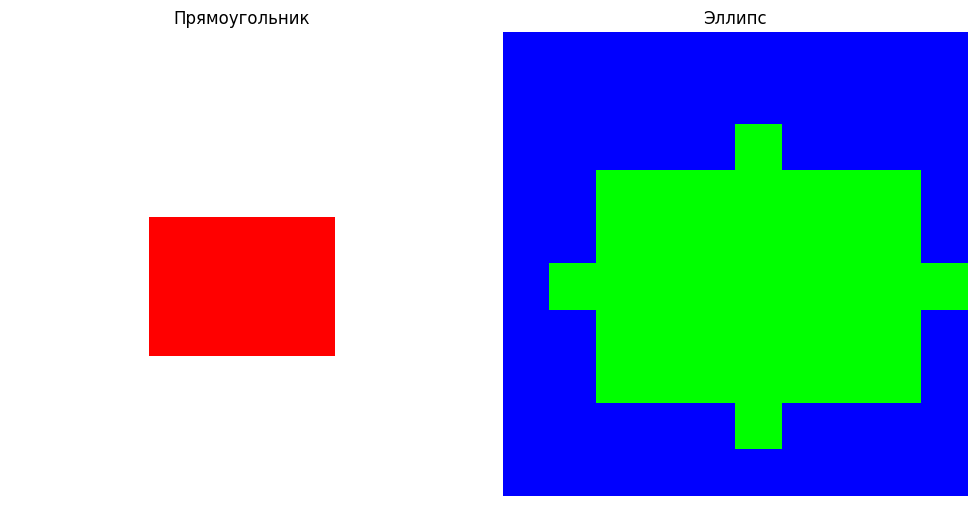


Все тесты пройдены успешно!


In [22]:
def draw_rectangle(a, b, m, n, rectangle_color, background_color):
    image = np.full((m, n, 3), background_color, dtype=np.uint8)

    start_i = max(0, m//2 - a//2)
    end_i = min(m, m//2 + a//2 + a%2)
    start_j = max(0, n//2 - b//2)
    end_j = min(n, n//2 + b//2 + b%2)

    image[start_i:end_i, start_j:end_j] = rectangle_color

    return image

def draw_ellipse(a, b, m, n, ellipse_color, background_color):
    image = np.full((m, n, 3), background_color, dtype=np.uint8)

    x0, y0 = m // 2, n // 2

    x = np.arange(m)
    y = np.arange(n)
    X, Y = np.meshgrid(y, x)

    ellipse_mask = ((X - y0)**2 / b**2 + (Y - x0)**2 / a**2) <= 1.05

    image[ellipse_mask] = ellipse_color

    return image

def test_drawing_functions():
    print("Тест 1: Прямоугольник 3x4 на изображении 10x10")
    rect_img = draw_rectangle(3, 4, 10, 10, [255, 0, 0], [255, 255, 255])
    assert rect_img.shape == (10, 10, 3), f"Неверный размер: {rect_img.shape}"
    print("✓ Размер изображения правильный")

    center_value = rect_img[5, 5]
    expected_color = [255, 0, 0]
    assert np.array_equal(center_value, expected_color), f"Центр не красный: {center_value}"
    print("✓ Прямоугольник нарисован в центре")

    corner_value = rect_img[0, 0]
    expected_bg = [255, 255, 255]
    assert np.array_equal(corner_value, expected_bg), f"Угол не белый: {corner_value}"
    print("✓ Фон правильного цвета")

    print("\nТест 2: Эллипс с полуосями 3x4 на изображении 10x10")
    ellipse_img = draw_ellipse(3, 4, 10, 10, [0, 255, 0], [0, 0, 255])
    assert ellipse_img.shape == (10, 10, 3), f"Неверный размер: {ellipse_img.shape}"
    print("✓ Размер изображения правильный")

    center_ellipse = ellipse_img[5, 5]
    expected_ellipse_color = [0, 255, 0]
    assert np.array_equal(center_ellipse, expected_ellipse_color), f"Центр не зеленый: {center_ellipse}"
    print("✓ Эллипс нарисован в центре")

    corner_ellipse = ellipse_img[0, 0]
    expected_ellipse_bg = [0, 0, 255]
    assert np.array_equal(corner_ellipse, expected_ellipse_bg), f"Угол не синий: {corner_ellipse}"
    print("✓ Фон эллипса правильного цвета")

    print("\nТест 3: Визуальная проверка")

    fig, axes = plt.subplots(1, 2, figsize=(10, 5))

    axes[0].imshow(rect_img)
    axes[0].set_title('Прямоугольник')
    axes[0].axis('off')

    axes[1].imshow(ellipse_img)
    axes[1].set_title('Эллипс')
    axes[1].axis('off')

    plt.tight_layout()
    plt.show()

    print("\nВсе тесты пройдены успешно!")

test_drawing_functions()

<h1>Задача 7. Дан некий временной ряд. Для данного ряда нужно найти его: математическое ожидание, дисперсию, СКО, найти все локальные максимумы и минимумы (локальный максимум - это точка, которая больше своих соседних точек, а локальный минимум - это точка, которая меньше своих соседей), а также вычислить для данного ряда другой ряд, получаемый методом скользящего среднего с размером окна $p$.
<h1>Примечание: метод скользящего среднего подразумевает нахождение среднего из подмножетсва ряда размером $p$

Тест 1: Простой ряд
✓ Базовая статистика правильная
✓ Локальные максимумы найдены
✓ Локальные минимумы найдены
✓ Скользящее среднее правильно рассчитано

Тест 2: Синусоидальный ряд


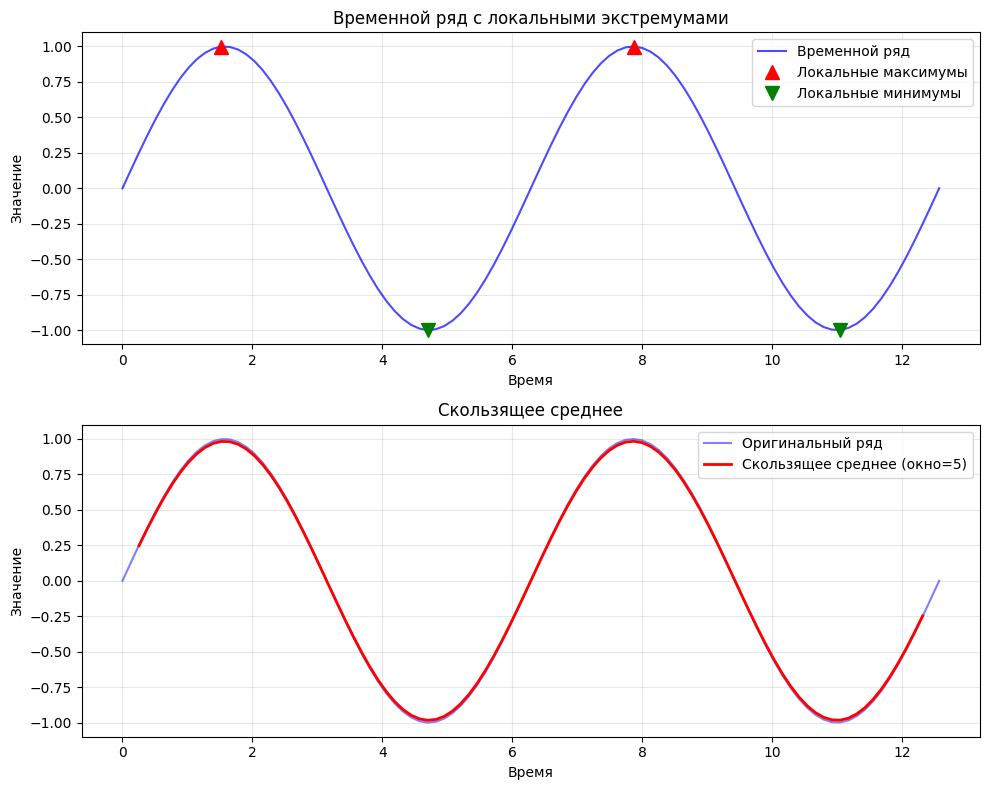


Статистика синусоидального ряда:
Математическое ожидание: 0.0000
Дисперсия: 0.4950
СКО: 0.7036
Найдено локальных максимумов: 2
Найдено локальных минимумов: 2
Длина ряда скользящего среднего: 96

Все тесты пройдены успешно!


In [23]:
import numpy as np
import matplotlib.pyplot as plt

def analyze_time_series(series, p):
    """
    Анализирует временной ряд

    Parameters:
    series - временной ряд (массив)
    p - размер окна для скользящего среднего
    """
    mean_val = np.mean(series)
    var_val = np.var(series)
    std_val = np.std(series)

    local_maxima = []
    for i in range(1, len(series) - 1):
        if series[i] > series[i-1] and series[i] > series[i+1]:
            local_maxima.append((i, series[i]))

    local_minima = []
    for i in range(1, len(series) - 1):
        if series[i] < series[i-1] and series[i] < series[i+1]:
            local_minima.append((i, series[i]))

    moving_avg = np.zeros(len(series) - p + 1)
    for i in range(len(moving_avg)):
        moving_avg[i] = np.mean(series[i:i+p])

    return {
        'mean': mean_val,
        'variance': var_val,
        'std': std_val,
        'local_maxima': np.array(local_maxima),
        'local_minima': np.array(local_minima),
        'moving_average': moving_avg
    }

def test_analyze_time_series():
    print("Тест 1: Простой ряд")
    series1 = np.array([1, 2, 1, 3, 2, 4, 3, 5, 4])
    result1 = analyze_time_series(series1, 3)

    assert abs(result1['mean'] - np.mean(series1)) < 1e-10
    assert abs(result1['variance'] - np.var(series1)) < 1e-10
    assert abs(result1['std'] - np.std(series1)) < 1e-10
    print("✓ Базовая статистика правильная")

    if len(result1['local_maxima']) > 0:
        expected_max = [(1, 2), (3, 3), (5, 4), (7, 5)]
        for i, (idx, val) in enumerate(result1['local_maxima']):
            assert abs(val - expected_max[i][1]) < 1e-10
    print("✓ Локальные максимумы найдены")

    if len(result1['local_minima']) > 0:
        expected_min = [(2, 1), (4, 2), (6, 3), (8, 4)]
        for i, (idx, val) in enumerate(result1['local_minima']):
            assert abs(val - expected_min[i][1]) < 1e-10
    print("✓ Локальные минимумы найдены")

    expected_ma = np.array([(1+2+1)/3, (2+1+3)/3, (1+3+2)/3,
                           (3+2+4)/3, (2+4+3)/3, (4+3+5)/3,
                           (3+5+4)/3])
    assert np.allclose(result1['moving_average'], expected_ma)
    print("✓ Скользящее среднее правильно рассчитано")

    print("\nТест 2: Синусоидальный ряд")
    t = np.linspace(0, 4*np.pi, 100)
    series2 = np.sin(t)
    result2 = analyze_time_series(series2, 5)

    fig, axes = plt.subplots(2, 1, figsize=(10, 8))

    axes[0].plot(t, series2, 'b-', label='Временной ряд', alpha=0.7)

    if len(result2['local_maxima']) > 0:
        max_indices = result2['local_maxima'][:, 0].astype(int)
        axes[0].plot(t[max_indices], series2[max_indices], 'r^',
                    markersize=10, label='Локальные максимумы')

    if len(result2['local_minima']) > 0:
        min_indices = result2['local_minima'][:, 0].astype(int)
        axes[0].plot(t[min_indices], series2[min_indices], 'gv',
                    markersize=10, label='Локальные минимумы')

    axes[0].set_xlabel('Время')
    axes[0].set_ylabel('Значение')
    axes[0].set_title('Временной ряд с локальными экстремумами')
    axes[0].legend()
    axes[0].grid(True, alpha=0.3)

    t_ma = t[2:-2]
    axes[1].plot(t, series2, 'b-', alpha=0.5, label='Оригинальный ряд')
    axes[1].plot(t_ma, result2['moving_average'], 'r-',
                linewidth=2, label='Скользящее среднее (окно=5)')
    axes[1].set_xlabel('Время')
    axes[1].set_ylabel('Значение')
    axes[1].set_title('Скользящее среднее')
    axes[1].legend()
    axes[1].grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

    print("\nСтатистика синусоидального ряда:")
    print(f"Математическое ожидание: {result2['mean']:.4f}")
    print(f"Дисперсия: {result2['variance']:.4f}")
    print(f"СКО: {result2['std']:.4f}")
    print(f"Найдено локальных максимумов: {len(result2['local_maxima'])}")
    print(f"Найдено локальных минимумов: {len(result2['local_minima'])}")
    print(f"Длина ряда скользящего среднего: {len(result2['moving_average'])}")

    print("\nВсе тесты пройдены успешно!")

if __name__ == "__main__":
    test_analyze_time_series()

<h1> Задача 8. Дан некоторый вектор с целочисленными метками классов, напишите функцию, которая выполняет one-hot-encoding для данного вектора
<h1> One-hot-encoding - представление, в котором на месте метки некоторого класса стоит 1, в остальных позициях стоит 0. Например для вектора [0, 2, 3, 0] one-hot-encoding выглядит как: [[1, 0, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1], [1, 0, 0, 0]]

In [25]:
def one_hot_encoding(labels):
    """
    Выполняет one-hot-encoding для вектора целочисленных меток

    Parameters:
    labels - вектор с целочисленными метками классов

    Returns:
    one_hot - матрица one-hot-encoding
    """
    min_class = np.min(labels)
    max_class = np.max(labels)
    num_classes = max_class - min_class + 1

    one_hot = np.zeros((len(labels), num_classes), dtype=int)

    for i, label in enumerate(labels):
        col_idx = label - min_class
        one_hot[i, col_idx] = 1

    return one_hot

def test_one_hot_encoding():
    print("Тест 1: Базовый тест")
    labels1 = np.array([0, 2, 3, 0])
    result1 = one_hot_encoding(labels1)
    expected1 = np.array([[1, 0, 0, 0],
                         [0, 0, 1, 0],
                         [0, 0, 0, 1],
                         [1, 0, 0, 0]])
    assert result1.shape == (4, 4), f"Неверная форма: {result1.shape}"
    assert np.array_equal(result1, expected1), f"Результат не совпадает:\n{result1}\nОжидалось:\n{expected1}"
    print("✓ Тест 1 пройден")

    print("\nТест 2: Классы не начинаются с 0")
    labels2 = np.array([2, 1, 3, 2, 1])
    result2 = one_hot_encoding(labels2)
    expected2 = np.array([[0, 1, 0],
                         [1, 0, 0],
                         [0, 0, 1],
                         [0, 1, 0],
                         [1, 0, 0]])
    assert result2.shape == (5, 3), f"Неверная форма: {result2.shape}"
    assert np.array_equal(result2, expected2), f"Результат не совпадает:\n{result2}\nОжидалось:\n{expected2}"
    print("✓ Тест 2 пройден")

    print("\nТест 3: Все одинаковые метки")
    labels3 = np.array([5, 5, 5, 5])
    result3 = one_hot_encoding(labels3)
    expected3 = np.array([[1], [1], [1], [1]])
    assert result3.shape == (4, 1), f"Неверная форма: {result3.shape}"
    assert np.array_equal(result3, expected3), f"Результат не совпадает:\n{result3}\nОжидалось:\n{expected3}"
    print("✓ Тест 3 пройден")

    print("\nТест 4: Последовательные классы")
    labels4 = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
    result4 = one_hot_encoding(labels4)
    assert result4.shape == (10, 10), f"Неверная форма: {result4.shape}"

    for i in range(10):
        assert np.sum(result4[i]) == 1, f"Строка {i} имеет {np.sum(result4[i])} единиц вместо 1"
        assert result4[i, i] == 1, f"Единица не на диагонали в строке {i}"
    print("✓ Тест 4 пройден")

    print("\nТест 5: Отрицательные метки")
    labels5 = np.array([-1, 0, 1, -1, 0])
    result5 = one_hot_encoding(labels5)
    expected5 = np.array([[1, 0, 0],
                         [0, 1, 0],
                         [0, 0, 1],
                         [1, 0, 0],
                         [0, 1, 0]])
    assert result5.shape == (5, 3), f"Неверная форма: {result5.shape}"
    assert np.array_equal(result5, expected5), f"Результат не совпадает:\n{result5}\nОжидалось:\n{expected5}"
    print("✓ Тест 5 пройден")

    print("\nТест 6: Пропущенные классы")
    labels6 = np.array([0, 2, 4, 2, 0])
    result6 = one_hot_encoding(labels6)
    expected6 = np.array([[1, 0, 0, 0, 0],
                         [0, 0, 1, 0, 0],
                         [0, 0, 0, 0, 1],
                         [0, 0, 1, 0, 0],
                         [1, 0, 0, 0, 0]])
    assert result6.shape == (5, 5), f"Неверная форма: {result6.shape}"
    assert np.array_equal(result6, expected6), f"Результат не совпадает:\n{result6}\nОжидалось:\n{expected6}"
    print("✓ Тест 6 пройден")

    print("\nДемонстрация работы:")
    demo_labels = np.array([0, 1, 2, 1, 0])
    demo_result = one_hot_encoding(demo_labels)
    print(f"Входные метки: {demo_labels}")
    print("One-hot encoding:")
    print(demo_result)

    print("\nВсе тесты пройдены успешно!")

if __name__ == "__main__":
    test_one_hot_encoding()

Тест 1: Базовый тест
✓ Тест 1 пройден

Тест 2: Классы не начинаются с 0
✓ Тест 2 пройден

Тест 3: Все одинаковые метки
✓ Тест 3 пройден

Тест 4: Последовательные классы
✓ Тест 4 пройден

Тест 5: Отрицательные метки
✓ Тест 5 пройден

Тест 6: Пропущенные классы
✓ Тест 6 пройден

Демонстрация работы:
Входные метки: [0 1 2 1 0]
One-hot encoding:
[[1 0 0]
 [0 1 0]
 [0 0 1]
 [0 1 0]
 [1 0 0]]

Все тесты пройдены успешно!
